# Workshop Redes Neurais
## Turing USP

![Pytorch logo](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png)

In [2]:
!pip install torch torchvision # Se você não os tiver no seu computador, pode levar um tempo

## 🔥 Básicos de Pytorch 🔥

### Tensores
*Os blocos de construção das redes neurais*

Primeiro vamos ver alguns análogos entre **numpy** e **Pytorch**

#### Matrizes
 - Em Pytorch, matrizes (*arrays*) são chamados de tensores.
 - Uma matriz $3\times3$, por exemplo é um tensor $3\times3$
 - Podemos criar um array numpy com o método `np.array()`
 - Podemos pegar o tipo do array com `type()`
 - Podemos pegar o formato do *array* com `np.shape()`. Linha $\times$ Coluna

In [2]:
import numpy as np
import math

array = [[1,2,3],[4,5,6]]
primeiro_array = np.array(array) # array 2x3
print(f"Array do tipo: {type(primeiro_array)}")
print(f"Array de formato: {np.shape(primeiro_array)}")
print(primeiro_array)

Array do tipo: <class 'numpy.ndarray'>
Array de formato: (2, 3)
[[1 2 3]
 [4 5 6]]


- Criamos um tensor com o método `torch.Tensor()`
- `tensor.type`: tipo do *array*, nesse caso um tensor
- `tensor.shape`: formato do *array*. Linha $\times$ Coluna 
- `tensor.device` : por onde este tensor está sendo processado

In [5]:
import torch

tensor = torch.Tensor(array)
print(f"Array do tipo: {tensor.type}")
print(f"Array de formato: {tensor.shape}")
print(f"Tensor sendo armazenado em {tensor.device}")
print(tensor)

Array do tipo: <built-in method type of Tensor object at 0x7f7be9002040>
Array de formato: torch.Size([2, 3])
Tensor sendo armazenado em cpu
tensor([[1., 2., 3.],
        [4., 5., 6.]])


Podemos fazer a alocação de *arrays* de maneira análoga nas duas linguagens:
 - `np.ones()` = `torch.ones()`
 - `np.random.rand()` = `torch.rand()`

In [5]:
print(f"Numpy:\n {np.ones((2,3))}\n")

print(torch.ones((2,3)))

Numpy:
 [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
print(f"Numpy:\n {np.random.rand(2,3)}\n")

print(torch.rand(2,3))

Numpy:
 [[0.08671408 0.49934561 0.30959953]
 [0.82502813 0.20475478 0.19673553]]

tensor([[0.6358, 0.7986, 0.4840],
        [0.8685, 0.8681, 0.8978]])


#### Convertendo de numpy para torch e vice-versa

Em muitos pontos **numpy** e **pytorch** são bem parecidos em suas estruturas, e muitas das vezes podemos utilizar os dois em conjunto. Assim normalmente convertemos resultados de redes neurais - que são tensores - para **arrays** de **numpy**.

Os métodos para fazer a conversão entre tensores e arrays numpy:
 - `torch.from_numpy()`: de um array numpy para um tensor
 - `tensor.numpy()`: de um tensor para um array numpy

In [7]:
array = np.random.rand(2,2)
print(f"{type(array)} \n {array} \n")

de_numpy_para_tensor = torch.from_numpy(array)
print(f"{de_numpy_para_tensor} \n")

tensor = de_numpy_para_tensor
de_tensor_para_numpy = tensor.numpy()
print(f"{type(de_tensor_para_numpy)} \n {de_tensor_para_numpy}")

<class 'numpy.ndarray'> 
 [[0.63234495 0.46604938]
 [0.19246808 0.4209175 ]] 

tensor([[0.6323, 0.4660],
        [0.1925, 0.4209]], dtype=torch.float64) 

<class 'numpy.ndarray'> 
 [[0.63234495 0.46604938]
 [0.19246808 0.4209175 ]]


Quando fazemos estas conversões também podemos fazer um *typecast* (mudança do tipo) das variáveis, isso pode ser útil já que o Pytorch faz uma série de computações de baixo nível, o qual o tipo primitivo das variáveis precisa ser bem especificado e definido, para isso podemos usar o método `tensor.type(torch.TipoDeTensor)`, alguns tipo de tensores nativos do Pytorch são:
  - `torch.FloatTensor` - pontos flutuantes de 32-bits
  - `torch.DoubleTensor` - pontos flutuantes de 64-bits
  - `torch.IntTensor` - números inteiros de 32-bits
  - `torch.LongTensor` - números inteiros de 64-bits
É muito comum encontrarmos *bugs* causados pela utilização errada de algum tipo primitivo, você pode ler sobre todos eles na [documentação do Pytorch](https://pytorch.org/docs/stable/tensors.html)


In [8]:
array = np.array([[1,10],[2,20]])

# Transformar em um tensor de Floats:
tensor_float = torch.from_numpy(array).type(torch.FloatTensor)
print(f"{type(tensor_float)} \n {tensor_float}\n")

# Transformar em um tensor de Longs:
tensor_long = torch.from_numpy(array).type(torch.LongTensor)
print(f"{type(tensor_long)} \n {tensor_long}")

<class 'torch.Tensor'> 
 tensor([[ 1., 10.],
        [ 2., 20.]])

<class 'torch.Tensor'> 
 tensor([[ 1, 10],
        [ 2, 20]])


#### Operações com tensores
Existem mais de 100 operações implementadas para tensores, incluindo aritmética, álgebra linear, manipulação de matrizes etc. É interessante que você as cheque [aqui](https://pytorch.org/docs/stable/torch.html).

O mais interessante, inclusive algo que possibilitou a utilização em massa de redes neurais, é o processamento dessas operações em GPU's (que geralmente possuem uma maior velocidade do que CPU's).

Por padrão tensores são criados na CPU. Nós podemos explicitamente mover para GPU's utilizando o método `.to` (isso, claro, se você pode usar uma GPU).

In [9]:
tensor = torch.ones(3,3)
print(f"Para esse notebook podemos usar a GPU? {torch.cuda.is_available()}")

# Move nosso tensor para uma GPU se possível
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

Para esse notebook podemos usar a GPU? False


Operações de splicing padrões:

In [10]:
print('Primeira linha: ', tensor[0])

print('Primeira coluna: ', tensor[:, 0])

print('Última coluna:', tensor[..., -1])

tensor[:,1] = 0 # Colocar a segunda coluna como 0's
print(tensor)

print(f"{tensor.view(9).shape}: {tensor.view(9)} \n") # Podemos mudar o formato do tensor

Primeira linha:  tensor([1., 1., 1.])
Primeira coluna:  tensor([1., 1., 1.])
Última coluna: tensor([1., 1., 1.])
tensor([[1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.]])
torch.Size([9]): tensor([1., 0., 1., 1., 0., 1., 1., 0., 1.]) 




Operações aritméticas

In [11]:
tensor = torch.ones(3,3)

print(f"Adição: \n{torch.add(tensor, tensor)} \n")

print(f"Subtração: \n{torch.sub(tensor, tensor)} \n")

print(f"Multiplicação elemento-a-elemento: \n{torch.mul(tensor, tensor)} \n")

print(f"Divisão elemento-a-elemento: \n{torch.div(tensor, tensor)} \n")

print(f"Multiplicação de matriz:\n{torch.matmul(tensor, tensor.T)}\n ")

Adição: 
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]]) 

Subtração: 
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 

Multiplicação elemento-a-elemento: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

Divisão elemento-a-elemento: 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

Multiplicação de matriz:
tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])
 


Operações com só um tensor 

In [12]:
tensor = torch.Tensor([1,2,3,4,5])

print(f"Soma: {tensor.sum()}\n")

print(f"Média: {tensor.mean()} \n")

print(f"Desvio padrão: {tensor.std()} \n")

Soma: 15.0

Média: 3.0 

Desvio padrão: 1.5811388492584229 



### Autograd e back propagation
*Diferenciação automática e back prop com `torch.autograd`*

Quando treinamos redes neurais, o algoritmo mais usado é a back propagation. Nesse algoritmo, parâmetros (os *weights* do modelo) são ajustados de acordo com o gradiente da função de perda em respeito com o parâmetro dado.

Para computar esses gradientes, o PyTorch tem uma implementação de diferenciação (o cálculo de derivadas) chamado `torch.autograd`. Ele faz computações automáticas de gradientes para qualquer *computational graph*.

Considere a rede neural mais simples de uma camada, com entrada `x`, parâmetros `w` e `b` e alguma função de perda. Ela pode ser definida da seguinte maneira:

![Diagrama do computational graph](https://i.imgur.com/x6DBPFQ.png)

In [13]:
x = torch.ones(5)  # [1 1 1 1 1] vetor de entrada

y = torch.ones(3)*2  # [2 2 2] valor esperado

w = torch.full((5, 3), 3.0, requires_grad=True) # [ 3 3 3 ; 3 3 3 ; 3 3 3 ; 3 3 3 ; 3 3 3] matriz de pesos

b = torch.ones(3, requires_grad=True) # [1 1 1] matriz de bias

z = torch.matmul(x, w) + b # [16 16 16] 

loss = torch.sum(torch.pow(z,y)) # [768] função de perda

Agora podemos computar os gradientes seguindo esse diagrama:

![diagrama para calcular os gradiantes dos parâmetros](https://i.imgur.com/fSoQQBC.png)

Para otimizar os pesos (weights) dos parâmetros da rede neural, precisamos computar as derivadas da nossa "função de perda" em respeito aos parâmetros. Precisamente $\frac{\partial \, \mathrm{loss}}{\partial w}$ e $\frac{\partial \, \mathrm{loss}}{\partial b}$ para valores fixos de `x` e `y`. Para computar as derivadas, utilizamos `loss.backward()` os valores ficam armazenados em `w.grad` e `b.grad`.

In [14]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[32., 32., 32.],
        [32., 32., 32.],
        [32., 32., 32.],
        [32., 32., 32.],
        [32., 32., 32.]])
tensor([32., 32., 32.])


Por padrão, todos os tensores com parâmetro `requires_grad=True` estão monitorando seu histórico de funções computadas para calcular seu gradiente. Porém em alguns casos isso pode não ser necessário, isso pode acontecer em casos como:
 - Para marcar alguns parâmetros como **frozen parameters**. Algo comum quando você quer aperfeiçoar uma rede pré-treinada
 - Para **acelearar** as computações quando você está apenas passando pelo passo de **forward**, no qual computações com tensores que não monitoram gradientes são mais úteis.

Podemos para de monitorar os gradientes colocando nosso código em um bloco com  `with torch.no_grad()`

In [15]:
# Monitora os gradientes
z = torch.matmul(x, w) + b
print(z.requires_grad)

# Não monitora os gradientes
with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


O mesmo resultado com o método `detach()`

In [16]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


### Datasets e Dataloader
*Um meio de padronizar e otimizar dados para as redes neurais no PyTorch*

O PyTorch fornece dois "tipos primitivos" (é como se fossem ints, floats, bools) para otimizar e padronizar datasets e depois dizer para a rede neural como ela deve ler esse dataset, eles são o `torch.utils.data.Dataset` e o `torch.utils.data.DataLoader`.

O PyTorch também nos fornece alguns datasets já prontos, o [Fashion-MINIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) é um deles, ele é um dataset com imagens de roupas em 28x28 com 60.000 imagens de treino e 10.000 de teste. Vamos usar ele tanto nesse exemplo quanto no exemplo de redes neurais.

Mesmo que o dataset já esteja montado, vamos passar quais seriam os passos para criar um dataset do zero. Vale dizer que nem sempre precisamos realizar esses passos, muitas vezes podemos passar nossos dados de maneira "cru" como tensores, mas é interessante sabê-los.

In [17]:
import torch
from torch.utils.data import Dataset # estrutura de dataset de tensores 
from torchvision import datasets # datasets já existentes no pytorch
from torchvision.transforms import ToTensor # para transformar as imagens em tensores
import matplotlib.pyplot as plt 

In [18]:
training_data = datasets.FashionMNIST(
    root = 'data', # Onde vai armazenar o dataset
    train = True, # Especifica que é o dataset de treino
    download= True, # baixa o dataset da internet
    transform= ToTensor() # transforma em tensor
)

test_data = datasets.FashionMNIST(
    root = 'data', 
    train = False, 
    download= True, 
    transform= ToTensor() 
)

Podemos dar uma olhada em como são as imagens do dataset:

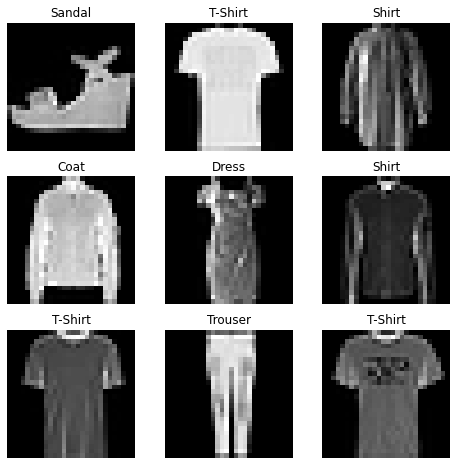

In [90]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### Preparando seu dataset para o treino com o Dataloader

Quando você treinar seu modelo com seus dados do dataset, você vai querer passá-los como _minibatches_ (quantos dados serão alimentados antes de treinar o modelo), e também embaralhar esses minibathcs a cada _epoch_ (uma passada por todo o dataset) para que o modelo não veja informação na sequência dos dados. O **Dataloader** é a ferramenta do PyTorch que nós possibilita fazer isso de maneira facilitada.

In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) # Aqui definimos o tamanho do batch como 64 e que embaralhe a amostra
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Formato do batch das features: torch.Size([64, 1, 28, 28])
Formato do batch das labels: torch.Size([64])


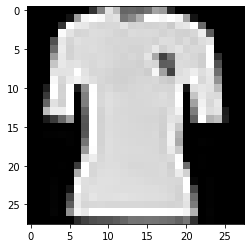

Label: T-Shirt


In [21]:
# Podemos visualizar uma batch do nosso dataloader
train_features, train_labels = next(iter(train_dataloader)) # O dataloader é um objeto iterável
print(f"Formato do batch das features: {train_features.size()}") # repare como são 64 imagens de 28x28 pixels
print(f"Formato do batch das labels: {train_labels.size()}") # repare como são 64 labels
img = train_features[0].squeeze() # remove todas as dimensões com valores 1
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

#### Criando um dataset customizado
Como tinha dito antes, normalmente não teremos um dataset bonitinho assim na natureza, e normalmente você terá que o fazer. Muitas vezes, pode-se usar apenas tensores, sem criar o dataset e o dataloader, porém essa geralmente não é a opção mais padronizada nem mais optimizada para imagens e textos. Segue um exemplo de como construir seu próprio dataset para imagens:

Toda classe customizada de dataset deve conter 3 métodos: 
- `__init__` : Método que é executado quando você instância (cria/chama) o dataset. Normalmente você vai passar o endereço dos seus dados, de suas categorias e se precisar, alguma transformação neles.
- `__len__` : Serve para falar quantas amostras existem no seu dataset
- `__getitem__` : Serve quando você tem que pegar um elemento do seu dataset dado um índice `idx`. Vai identificar o endereço do elemento no disco e converter para um tensor e aplicar as transformações, caso você as tenha solicitado. 


In [22]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        """
        Parâmetros
        ----------
            annotations_file : str
                endereço do CSV das labels das imagens
            img_dir : str
                endereço do diretório onde estão as imagens
            transform : function
                funções de transformação que podem ser aplicadas nas imagens
            target_transform : function
                funções de transformação que podem ser aplicadas nas labels

        """
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # pega o endereço de uma única imagem
        image = read_image(img_path) # transforma essa imagem em tensor
        label = self.img_labels.iloc[idx, 1] # pega a label dessa imagem
        # Se houverem transformações a serem apliacadas, aplicá-las
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## 🧠 Construíndo as redes neurais 🧠

Redes neurais são basicamente compostas por diversas camadas, cada uma com um tipo de operação. O módulo `torch.nn` possui todos os blocos que precisamos para a construção dessas redes. Todas as redes neurias no PyTorch são filhos da classe `nn.Module`, por isso precisamos que nossa rede dependa dele.

In [23]:
from torch import nn

In [25]:
# Fazer o processamento em uma GPU caso seja possível
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Usando {device}')

Usando cpu


### Layers mais usados

Vamos fazer um exemplo com um minibatch de 3 "imagens" feitas de pontos aleatório e ver como seriam as etapas de cada camada de uma rede neural de maneira individual, para que depois possamos juntá-los em uma rede só.

**Dados de entrada**:

A dimensão da entrada é : torch.Size([3, 28, 28])


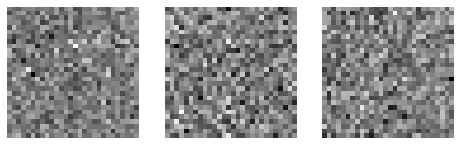

In [46]:
input_image = torch.randn((3,28,28))
print(f"A dimensão da entrada é : {input_image.size()}")

# Para mostrar as "imagens"
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 1
for i in range(1,4):
    img = input_image[i-1]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

**Camada de achatamento**

A camada de ``nn.Flatten`` converte imagens 2D em um único vetor. No caso, uma imagem de 28x28 se torna um vetor de 784 elementos, em que cada elmento é um pixel.

In [47]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(f"Dimensão das imagens achtadas {flat_image.size()}")

Dimensão das imagens achtadas torch.Size([3, 784])


**Camada Linear**

A camada linear é onde aplicamos as operações entre os pesos (weights), bias e dados. Possui esse nome porque essa operação é uma "Transformação linear": $W \cdot X + b$, repare como esse formato lembra da "equação linear" que aprendemos na escola. 

In [48]:
layer1 = nn.Linear(in_features=28*28, out_features=20) # Aqui definimos qual a dimensão da entrada e qual será a dimensão da saída
hidden1 = layer1(flat_image) # Passamos nossa imagem achatada para a camada
print(f"Dimensão da imagem depois de ter passado pela primeira camada: {hidden1.size()}")

Dimensão da imagem depois de ter passado pela primeira camada: torch.Size([3, 20])


**Camada de Ativação**

**A função de ativação retificadora linear** (*Rectified Linear Activation Function*) - ReL 

Para conseguirmos passar um sinal para a próxima camada, necessitamos de funções de ativação. Duas funções comuns são as [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) e [tangente hiperbólica](https://mathworld.wolfram.com/HyperbolicTangent.html), ambas funções não lineares, uma propriedade que ajuda nosso modelo a compreender funções mais complexas. Porém, como elas são funções com limites bem estabelecidos, elas acabam "saturando" suas saídas, sendo sensíveis apenas para seus valores intermediários. A solução é utilizar a função de ativação retificadora linear (ReL) nos *hidden layers*. Dizemos que um nó (ou neurônio) com essa função de ativação é uma unidade de ativação retificadora linear (ReLU)

$$
f(x) = \begin{cases}
    x & \text{se } x > 0, \\
    0 & \text{caso contrário}.
\end{cases}
$$

![Funções de Ativação](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1200%2F1*ZafDv3VUm60Eh10OeJu1vw.png&f=1&nofb=1)

In [49]:
print(f"Antes do ReLU: {hidden1}\n\n")
activation1 = nn.ReLU()
hidden1 = activation1(hidden1)
print(f"Depois ReLU: {hidden1}")

Antes do ReLU: tensor([[ 0.4115,  0.2556, -0.8706,  0.2694,  1.1218,  1.1283,  0.0394,  0.2414,
         -1.2277,  0.2783,  0.1270,  0.2232, -0.5999,  0.5526,  0.6389,  0.9313,
          0.0566, -0.8101,  0.8604,  0.0730],
        [ 0.2263,  0.9847,  0.5956, -0.0978,  0.7770, -0.4630, -0.2834, -0.2654,
          0.1249,  1.4165, -0.1635,  0.0968, -0.2180, -0.6618, -0.8552,  0.2779,
          0.2028,  0.0032, -0.0607, -0.2144],
        [ 0.9644,  0.2332, -0.5560,  0.8772, -0.6845,  0.0557, -1.0827,  0.1905,
         -0.2625,  0.7389,  0.8003, -0.3916,  0.6638, -0.1815, -0.9949,  0.7081,
         -0.1485,  0.6466,  0.7466,  0.3837]], grad_fn=<AddmmBackward0>)


Depois ReLU: tensor([[0.4115, 0.2556, 0.0000, 0.2694, 1.1218, 1.1283, 0.0394, 0.2414, 0.0000,
         0.2783, 0.1270, 0.2232, 0.0000, 0.5526, 0.6389, 0.9313, 0.0566, 0.0000,
         0.8604, 0.0730],
        [0.2263, 0.9847, 0.5956, 0.0000, 0.7770, 0.0000, 0.0000, 0.0000, 0.1249,
         1.4165, 0.0000, 0.0968, 0.0000, 0.0000, 0

**Juntando todas as camadas sequencialmente**

o ``nn.Sequential`` é uma espécied de container de módulos. Os dados são passados para ele na mesma ordem que definimos, ele server para simplificar a criação das redes neurais. Vamos criar um exemplo com as camadas que fizemos até agora:  

In [52]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28) # batch de 3 imagens de entrada
logits = seq_modules(input_image) # Valores de saída são "logits", valores qeu relacionam probabilidades com numeros reais
logits

tensor([[ 0.1046, -0.0554,  0.1782,  0.1860, -0.0353, -0.1781,  0.3719, -0.3159,
         -0.1636, -0.0839],
        [ 0.2950, -0.0565,  0.0369,  0.1780, -0.1817,  0.0331,  0.3402, -0.1474,
         -0.1175,  0.0744],
        [ 0.3055,  0.0135,  0.1679,  0.0974,  0.0689, -0.2309,  0.3335, -0.3442,
         -0.1182, -0.0206]], grad_fn=<AddmmBackward0>)

**Função ``nn.Softamx``**

Como a última camada retorna "logits", podemos passá-los por uma função chamada **Softmax** que transforma esses números reais em valores de probabilidades (valores entre 0 ou 1). Mostrando qual a categoria mais provável para aquela imagem.

In [53]:
softmax = nn.Softmax(dim=1)
pred_probabilities = softmax(logits)
pred_probabilities

tensor([[0.1088, 0.0927, 0.1171, 0.1180, 0.0946, 0.0820, 0.1421, 0.0714, 0.0832,
         0.0901],
        [0.1264, 0.0890, 0.0977, 0.1125, 0.0785, 0.0973, 0.1323, 0.0812, 0.0837,
         0.1014],
        [0.1293, 0.0966, 0.1127, 0.1050, 0.1021, 0.0756, 0.1330, 0.0675, 0.0847,
         0.0933]], grad_fn=<SoftmaxBackward0>)

### A rede neural

Agora que você conhece todos os blocos da rede, podemos juntá-los para criar a rede neural! Para isso ciramos uma classe que é inicializada no método ``__init__`` com os elementos da rede. De maneira similar às classes do ``Dataloader``, qualquer filho do módulo ``nn.Module`` (ou seja, qualquer rede neural que criarmos no PyTorch), precisa de um método ``forward``, o método que passa os dados pela rede neural.

In [54]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__() # Herda os atributos do nn.Module do pytorch
        self.flatten = nn.Flatten() # Define o método de achatar imagens
        self.nn = nn.Sequential(   # Inicia o container de camadas
            nn.Linear(28*28, 512), # camada linear com 784 entradas e 512 saídas
            nn.ReLU(),             # unidade de ativação
            nn.Linear(512, 512),   # camada linear de 512 entradas e 512 saídas
            nn.ReLU(),             # unidade de ativação
            nn.Linear(512, 10),    # última camada linear com 512 entradas e 10 saídas 
        )

    def forward(self, x):    # método que passa os dados para a rede neural
        x = self.flatten(x)  # achata as imagens para uma dimensão
        logits = self.nn(x)  # pasas os dados pela rede, retornando 10 logits
        return logits

### Treinando a rede neural

Vamos agora para a parte mais importante das redes neurais, treiná-las! Para isso vamos usar os dados de treino e teste que já preparamos antes ``train_dataloader`` e ``test_dataloader``. Vamos também inicializar a nossa classe de rede neural no objeto ``model``.

In [55]:
model = NeuralNetwork()

#### Hiperparâmetros

São parâmetros que são ajustáveis e permitem que possámos controlar o modelo. Tipos diferentes de hiperparâmetros podem ter grandes efeitos no modelo. No nosso caso, vamos ter 3:
 - Número de epochs: número de vezes que nosso modelo vai **passar por todo o dataset**
 - Tamanho do batch: número de **amostras do nosso dataset** passadas pro modelo antes de atualizar seus parâmetros
 - Learning Rate: O quanto nosso modelo vai **atualizar seus parâmetros**.

In [59]:
learning_rate = 1e-3
batch_size = 64
epochs = 10

#### Função de perda (loss)

Quando nosso modelo está aprendendo ele não sabe a resposta certa. A **função de perda (loss)** é um meio de medir o quão certo ou errado nosso modelo estava da predição desejada, e é esse valor que queremos minimizar durante o treinamento (ou seja, que ele tenha o menor erro possível). Para computar esse erro, passamos o valor predito por nosso modelo e o valor alvo e calculamos essa diferença de algum modo.

Existem diferentes tipos de calcular o erro do modelo. Algumas funções comuns são [`nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) (Mean Squared Error) para regressões, [`nn.NNLoss`](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss) (Negative Log Likelihood) para classificações e [`nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) que combina a função `nn.LogSoftmax` com o `nn.NNLoss`.

Para nosso modelo, iremos usar a ``nn.CrossEntropyLoss` já que já normaliza nossos logits em valores de probabilidade e calcula uma loss comum em tarefas de classificação.

In [63]:
loss = nn.CrossEntropyLoss()

#### Otimizador

Com nossa função de perda definida, temos que definir agora qual técnica utilizaremos para chegar reduzir o erro em cada passo de treino. Existem [diferentes tipos de algoritmos de otimização](https://pytorch.org/docs/stable/optim.html) para redes neurais, sendo o **SGD** (Stocastic Gradient Descent) o mais simples e o que vamos utilizar para nosso modelo. Alguns menções de algoritmos que usamos bastante também é o ADAM e o RMSProp, que podem funcionar melhor dependendo do seu tipo de modelo.

In [60]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Passamos os parâmetros do nosso modelo e o leraning rate

Quando formos fazer nosso loop de treinamento, geralmente o passo de otimização é realizado vom 3 passos:
 - Chamar ``optimizer.zero_grad()`` para resetar os gradientes dos parâmetros do modelo. Gradientes por padrão se somam, para evitar que sejam contados duas vezes em treinamentos diferentes, nos explicitamente zeremos eles a cada iteração.
 - Faz a backpropagation da loss com ```loss.backwards()``. O autograd do PyTorch automaticamente depoisita os gradientes em relação a cada parâmetro. 
 - Com os gradientes calculados, podemos usar ``optimizer.setp()`` para ajustar os parâmetros dos gradientes coletados em cada passo anterior.  

#### Loop de otimização
Com nossos hiperparâmetros e otimizador prontos, podemos nos preparar par definir o loop de treino. Cada iteração desse loop de otimiação é chamado de **epoch**. O epoch consiste de duas partes principais
- **O loop de treino**: itera sobre o dataset de treino, tentando convergir os parâmetros para o melhor possível.
- **O loop de teste**: itera sobre o dataset de teste para checar como o modelo está se saindo. 

In [61]:
def train_loop(dataloader, model, loss_fn, optimizer):
    """
    Loop de treino do modelo

    Parâmetros
    ----------
        dataloader: dataloader do nosso dataset de treino definido anteriormente
        model: objeto com o modelo da nossa rede neural
        loss_fn: nossa função de perda
        optimizer: o otimizador definido
    """
    size = len(dataloader.dataset) # pega o tamanho do dataset
    for batch, (X, y) in enumerate(dataloader):
        # Computa a predição do modelo e a loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # A cada 100 treinos printamos as métricas
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    """
    Loop de teste do modelo

    Parâmetros
    ----------
        dataloader: dataloader do nosso dataset de teste definido anteriormente
        model: objeto com o modelo da nossa rede neural
        loss_fn: nossa função de perda
    """
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Como não vamos otimizar nada, não vamos acompanhar os gradientes
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)  # computa a predição do modelo
            test_loss += loss_fn(pred, y).item() # loss dessa predição
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() # quantas vezes nosso modelo acertou a predição

    test_loss /= num_batches
    correct /= size
    print(f"Erros do teste: \n Acurácia: {(100*correct):>0.1f}%, loss média: {test_loss:>8f} \n")

Podemos finalmente treinar nosso modelo!

In [64]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss, optimizer)
    test_loop(test_dataloader, model, loss)
print("Acabou!")

Epoch 1
-------------------------------
loss: 2.316973  [    0/60000]
loss: 2.290478  [ 6400/60000]
loss: 2.274734  [12800/60000]
loss: 2.272502  [19200/60000]
loss: 2.247754  [25600/60000]
loss: 2.235265  [32000/60000]
loss: 2.210061  [38400/60000]
loss: 2.212445  [44800/60000]
loss: 2.200044  [51200/60000]
loss: 2.171118  [57600/60000]
Erros do teste: 
 Acurácia: 50.2%, loss média: 2.162082 

Epoch 2
-------------------------------
loss: 2.164433  [    0/60000]
loss: 2.122852  [ 6400/60000]
loss: 2.118275  [12800/60000]
loss: 2.107344  [19200/60000]
loss: 2.099148  [25600/60000]
loss: 2.047626  [32000/60000]
loss: 2.048032  [38400/60000]
loss: 2.007643  [44800/60000]
loss: 1.985959  [51200/60000]
loss: 1.933286  [57600/60000]
Erros do teste: 
 Acurácia: 58.5%, loss média: 1.899416 

Epoch 3
-------------------------------
loss: 1.906189  [    0/60000]
loss: 1.863928  [ 6400/60000]
loss: 1.800094  [12800/60000]
loss: 1.816901  [19200/60000]
loss: 1.829520  [25600/60000]
loss: 1.653467

### Brincando com o modelo
Eu fiz uns desenhos toscos e vou ver como o modelo classifica eles

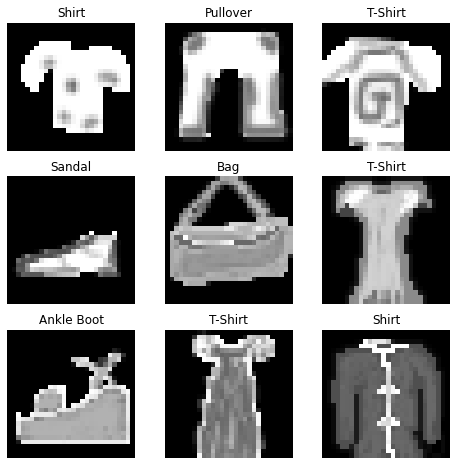

In [93]:
from torchvision.io import ImageReadMode

custom = []
for i in range(1,10):
    path = "./desenhos/cam_" + str(i) + ".png"
    img = read_image(path, ImageReadMode.GRAY)
    custom.append(img)

def predict(img):
    return labels_map[torch.argmax(model(img/255)).item()]

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, 10):
    img = custom[i-1]
    label = predict(img)
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Código Completo da Seção

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

model = NeuralNetwork()

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

learning_rate = 1e-3
batch_size = 64
epochs = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

## 📝Recomendação de exercícios
- 🔢 Um data set com [números desenhados a mão](https://www.kaggle.com/c/digit-recognizer) (MNIST clássico), para treinar os básicos
- 🦘 Um dataset que utiliza csv, [predição de chuvas na australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)
- 🐟 Um dataset de [imagens de peixes](https://www.kaggle.com/crowww/a-large-scale-fish-dataset), para treinar criar datasets/dataloaders
- 🦠 Um data set de [Tweets sobre o coronavirus ](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification), para treinar classificação de texto 